In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 7.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [40]:
import cv2
from ultralytics import YOLO
import numpy as np

In [41]:
model = YOLO('best.pt')
results = model.predict('0518.png', save_crop=True)

RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [4]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.])
conf: tensor([0.4196])
data: tensor([[6.0870e+00, 0.0000e+00, 1.7671e+03, 1.0780e+03, 4.1962e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (1080, 1920)
shape: torch.Size([1, 6])
xywh: tensor([[ 886.5851,  539.0051, 1760.9961, 1078.0101]])
xywhn: tensor([[0.4618, 0.4991, 0.9172, 0.9982]])
xyxy: tensor([[   6.0870,    0.0000, 1767.0831, 1078.0101]])
xyxyn: tensor([[0.0032, 0.0000, 0.9204, 0.9982]])

In [34]:
import cv2
input = cv2.imread('runs/detect/predict2/crops/court/0518.jpg')
#input = cv2.imread('0518.png')
resize_input = cv2.resize(input, (640, 640))

# Convert Image to Grayscale

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [57, 57, 57, ..., 73, 72, 72],
       [57, 57, 57, ..., 73, 72, 72],
       [57, 57, 57, ..., 73, 72, 72]], dtype=uint8)
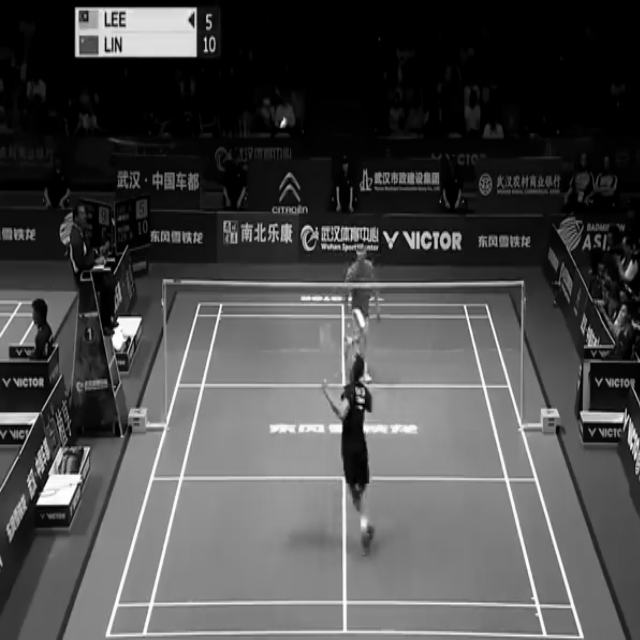

In [35]:
img = cv2.cvtColor(resize_input,cv2.COLOR_BGR2GRAY)
img

#Image Processing

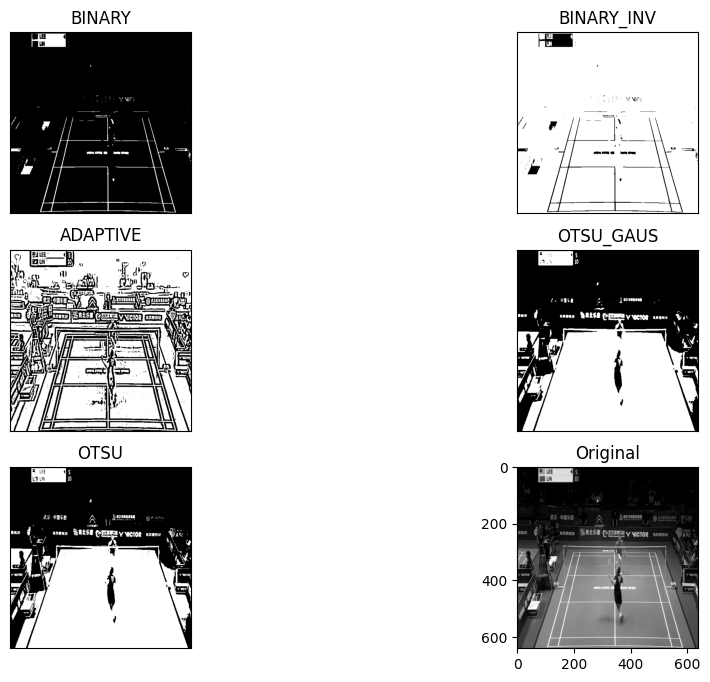

In [33]:
# Testing different Image Binarizations

from matplotlib import pyplot as plt

ret,th1 = cv2.threshold(img,190,255,cv2.THRESH_BINARY)
ret,th2 = cv2.threshold(img,190,255,cv2.THRESH_BINARY_INV)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

blur = cv2.GaussianBlur(img,(5,5),0)
ret,th4 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

ret,th5 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images = [th1,th2,th3,th4, th5]
titles = ['BINARY', 'BINARY_INV', 'ADAPTIVE', 'OTSU_GAUS', 'OTSU']


plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(3,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.subplot(3,2,6)
plt.imshow(img, 'gray')
plt.title('Original')
plt.show()

#Hough Line

##Canny Egde Detection


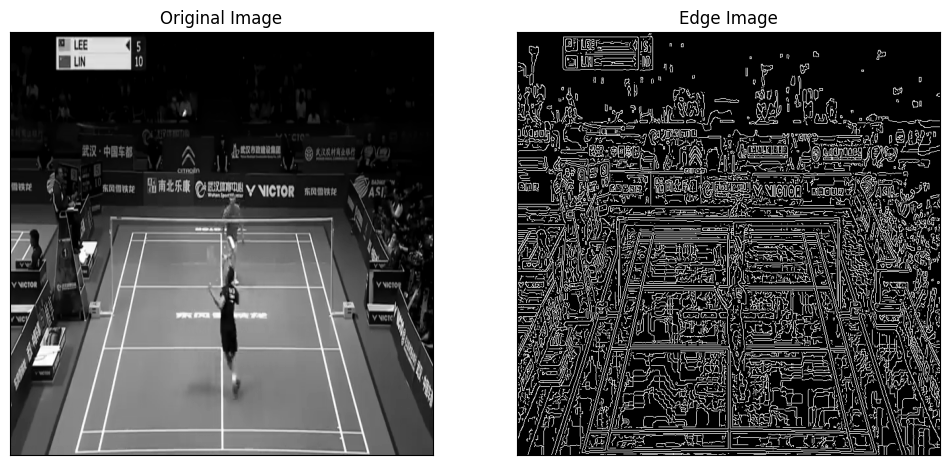

In [23]:
import numpy as np

# Visualizing edges

v = np.median(img)
sigma = 0.33

#---- apply automatic Canny edge detection using the computed median----
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edges = cv2.Canny(img, lower, upper, apertureSize=5)

plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

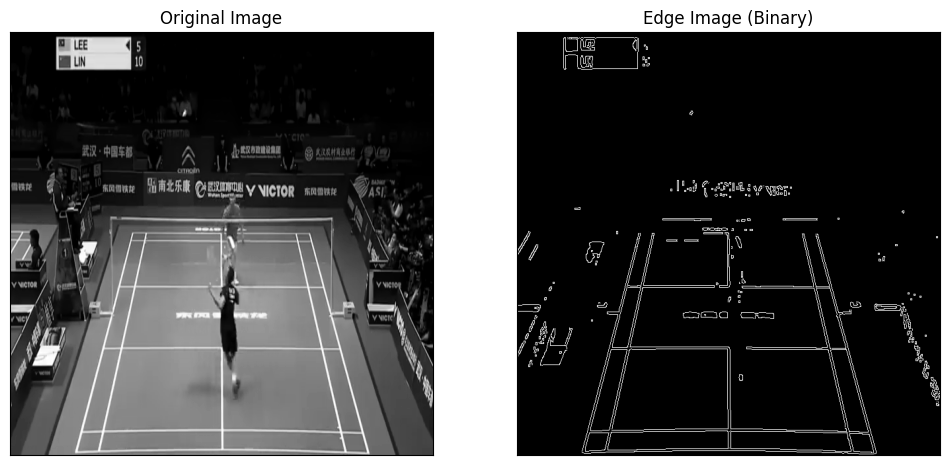

In [29]:
# Visualizing edges for binarized image

v = np.median(img)
sigma = 0.33

#---- apply automatic Canny edge detection using the computed median----
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edges = cv2.Canny(th1, lower, upper, apertureSize=7)

plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image (Binary)'), plt.xticks([]), plt.yticks([])
plt.show()

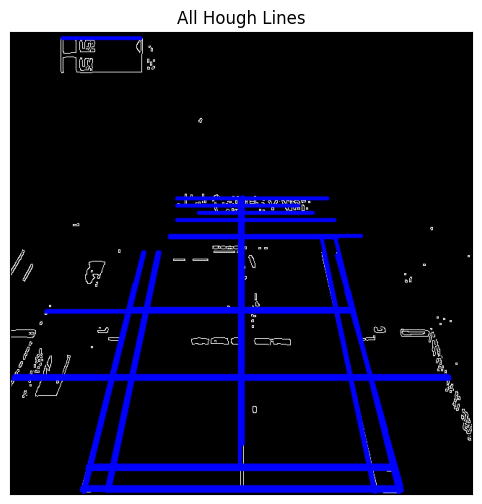

-1

In [30]:
# Probabilistic Hough Transform

import numpy as np
import math
from google.colab.patches import cv2_imshow
# Copy edges to the images that will display the results in BGR
cdstP = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

linesP = cv2.HoughLinesP(edges, 1, np.pi / 90, 90, None, 10, 250)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
cv2.line(cdstP, (230, 230), (440, 230), (0,0,255), 3, cv2.LINE_AA)
cv2.line(cdstP, (230, 240), (400, 240), (0,0,255), 3, cv2.LINE_AA)
cv2.line(cdstP, (260, 250), (420, 250), (0,0,255), 3, cv2.LINE_AA)
cv2.line(cdstP, (230, 260), (450, 260), (0,0,255), 3, cv2.LINE_AA)
#cv2_imshow(cdstP)
plt.figure(figsize=(8,6))
plt.imshow(cdstP, cmap='magma')
plt.title('All Hough Lines'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.waitKey()

#Lines Processing

In [ ]:
def segment_lines(lines, deltaX, deltaY):
    h_lines = []
    v_lines = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            if abs(y2-y1) < deltaY: #and 480<(y2 or y1)<650 and 830<(y2 or y1): # y-values are near; line is horizontal
                h_lines.append(line)
            elif abs(x2-x1) < deltaX: # x-values are near; line is vertical
                v_lines.append(line)
    return h_lines, v_lines

In [ ]:
h_lines, v_lines = segment_lines(linesP, 280, 0.5)
print('Total number of lines: ', linesP.shape[0])
print('Number of horizontal lines: ', len(h_lines))
print('Number of vertical lines: ', len(v_lines))

Total number of lines:  35
Number of horizontal lines:  11
Number of vertical lines:  24


## Draw all Vertical Lines

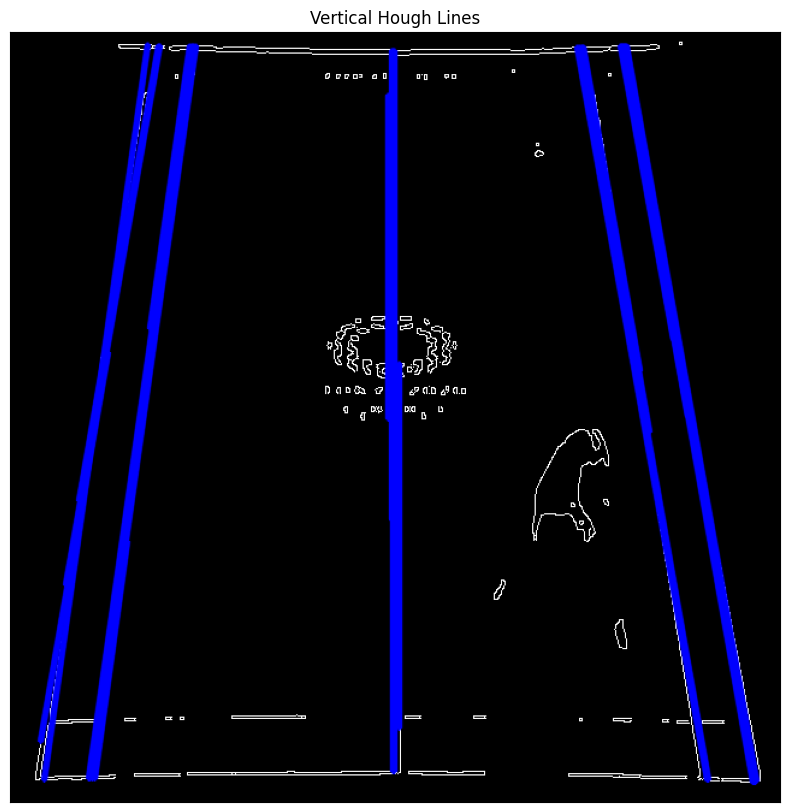

-1

In [ ]:
cdstP = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# Drawing Vertical Hough Lines on image
for i in range(len(v_lines)):
    l = v_lines[i][0]
    cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
#print(r)
plt.figure(figsize=(15,10))
plt.imshow(cdstP, cmap='magma')
plt.title('Vertical Hough Lines'), plt.xticks([]), plt.yticks([])
plt.show()

#cv2_imshow(cdstP)
cv2.waitKey()

## Draw all Horizontal Lines

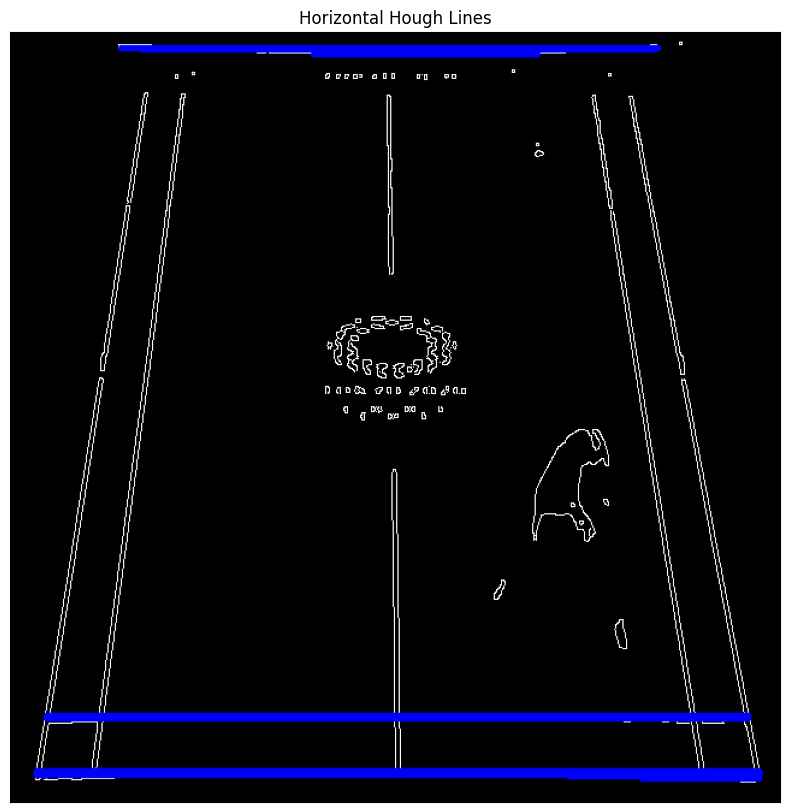

-1

In [ ]:
cdstP = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# Drawing Vertical Hough Lines on image
#r = []
for i in range(len(h_lines)):
    l = h_lines[i][0]
    #if (l[1] or l[3])>600 or (l[1] or l[3])<25: #or 480<(l[1] or l[3])<490:
      #r.append(math.dist((l[0], l[1]), (l[2], l[3])))
    cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
    # cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
#print(r)
plt.figure(figsize=(15,10))
plt.imshow(cdstP, cmap='magma')
plt.title('Horizontal Hough Lines'), plt.xticks([]), plt.yticks([])
plt.show()

#cv2_imshow(cdstP)
cv2.waitKey()

In [ ]:
h_lines

[array([[ 21, 617, 623, 617]], dtype=int32),
 array([[108,  14, 536,  14]], dtype=int32),
 array([[251,  18, 439,  18]], dtype=int32),
 array([[464, 618, 623, 618]], dtype=int32),
 array([[ 21, 615, 623, 615]], dtype=int32),
 array([[ 21, 616, 623, 616]], dtype=int32),
 array([[ 29, 570, 614, 570]], dtype=int32),
 array([[ 21, 614, 623, 614]], dtype=int32),
 array([[ 91,  13, 539,  13]], dtype=int32),
 array([[524, 620, 623, 620]], dtype=int32),
 array([[ 29, 568, 614, 568]], dtype=int32)]

In [ ]:
def filterHorizontalLines(h_lines, epsilon=0):
  h_results = []
  global upper_line, lower_line
  min_y = float('inf')
  max_y = float('-inf')
  for segment in h_lines:
    for x1, y1, x2, y2 in segment:
      if y1 < min_y:
        min_y = y1
        upper_line = segment
      if y1 > max_y:
        max_y = y1
        lower_line = segment
  upper_line[0][1] += epsilon
  upper_line[0][3] += epsilon
  h_results.append(upper_line)
  h_results.append(lower_line)
  return h_results

[array([[ 91,  13, 539,  13]], dtype=int32), array([[524, 620, 623, 620]], dtype=int32)]
Filtered Vertical Lines:  24
Filtered Horizontal Lines:  2


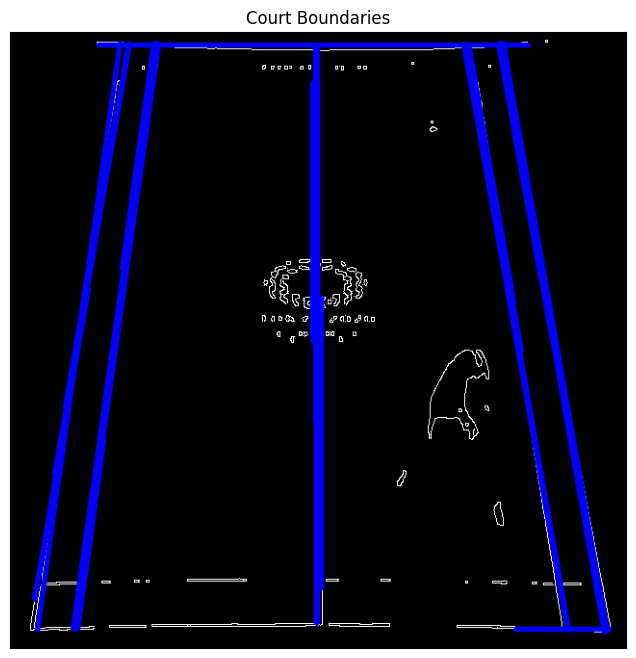

In [ ]:
cdstP = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
filtered_h_lines = filterHorizontalLines(h_lines)
print(filtered_h_lines)
print('Filtered Vertical Lines: ', len(v_lines))
print('Filtered Horizontal Lines: ', len(filtered_h_lines))

# Drawing Vertical Hough Lines on image
for i in range(len(v_lines)):
    l = v_lines[i][0]
    cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

# Drawing Horizontal Hough Lines on image
for i in range(len(filtered_h_lines)):
    l = filtered_h_lines[i][0]
    cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

plt.figure(figsize=(12,8))
plt.imshow(cdstP, cmap='Reds')
plt.title('Court Boundaries'), plt.xticks([]), plt.yticks([])
plt.show()

# Finding Intersection

In [ ]:
def find_intersection(line1, line2):
    # extract points
    x1, y1, x2, y2 = line1[0]
    x3, y3, x4, y4 = line2[0]
    # compute determinant
    Px = ((x1*y2 - y1*x2)*(x3-x4) - (x1-x2)*(x3*y4 - y3*x4))/  \
        ((x1-x2)*(y3-y4) - (y1-y2)*(x3-x4))
    Py = ((x1*y2 - y1*x2)*(y3-y4) - (y1-y2)*(x3*y4 - y3*x4))/  \
        ((x1-x2)*(y3-y4) - (y1-y2)*(x3-x4))

    return Px, Py

In [ ]:
def cluster_points(points, nclusters):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, _, centers = cv2.kmeans(points, nclusters, None, criteria, 10, cv2.KMEANS_PP_CENTERS)
    return centers

In [ ]:
# find the line intersection points
Px = []
Py = []
for h_line in filtered_h_lines:
    for v_line in v_lines:
        px, py = find_intersection(h_line, v_line)
        Px.append(px)
        Py.append(py)

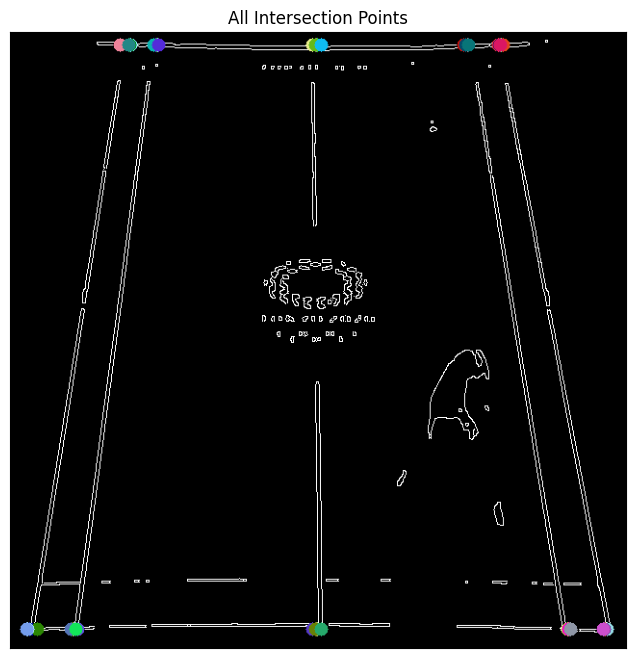

-1

In [ ]:
intersectsimg = edges.copy()
intersectsimg = cv2.cvtColor(intersectsimg, cv2.COLOR_GRAY2BGR)

for cx, cy in zip(Px, Py):
    cx = np.round(cx).astype(int)
    cy = np.round(cy).astype(int)
    color = np.random.randint(0,255,3).tolist() # random colors
    cv2.circle(intersectsimg, (cx, cy), radius=7, color=color, thickness=-1) # -1: filled circle

plt.figure(figsize=(12,8))
plt.imshow(intersectsimg, cmap='magma')
plt.title('All Intersection Points'), plt.xticks([]), plt.yticks([])
plt.show()

#cv2_imshow("Intersections", intersectsimg)
cv2.waitKey(0)

In [ ]:
# use clustering to find the centers of the data clusters

# P is the set of all the (x,y) of all the intersection points. This is done through column_stack
P = np.float32(np.column_stack((Px, Py)))
nclusters = 10
centers = cluster_points(P, nclusters)
print(centers)

[[      617.6         620]
 [     473.93          13]
 [     66.496         620]
 [     121.19          13]
 [      318.2         620]
 [      318.2          13]
 [     509.86          13]
 [       20.6         620]
 [     151.61          13]
 [     580.57         620]]


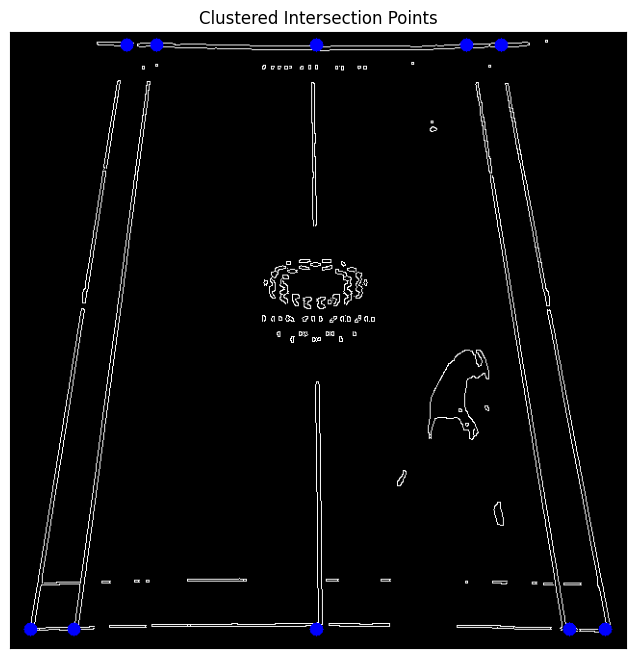

-1

In [ ]:
# draw the center of the clusters

intersectsimg = edges.copy()
intersectsimg = cv2.cvtColor(intersectsimg, cv2.COLOR_GRAY2BGR)

for cx, cy in centers:
    cx = np.round(cx).astype(int)
    cy = np.round(cy).astype(int)
    cv2.circle(intersectsimg, (cx, cy), radius=7, color=[0,0,255], thickness=-1) # -1: filled circle

plt.figure(figsize=(12,8))
plt.imshow(intersectsimg, cmap='magma')
plt.title('Clustered Intersection Points'), plt.xticks([]), plt.yticks([])
plt.show()

#cv.imshow("Center of intersection clusters", intersectsimg)
cv2.waitKey(0)

In [ ]:
def convert_centers_size(input, centers):
  w, h = input.shape[0], input.shape[1]
  for center in centers:
    center[0] = (center[0] * (h/640))
    center[1] = (center[1] * (w/640))
  return centers

In [ ]:
centers_after = convert_centers_size(input, centers)
#centers_after = centers

[       1325      592.88]
[     1016.7      12.431]
[     142.66      592.88]
[     259.98      12.431]
[     682.64      592.88]
[     682.64      12.431]
[     1093.8      12.431]
[     44.194      592.88]
[     325.26      12.431]
[     1245.5      592.88]


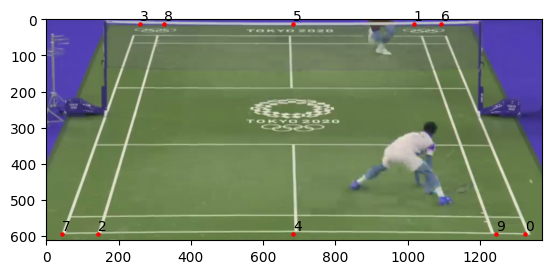

In [ ]:
plt.imshow(input)
i = 0
for point in centers_after:
  print(point)
  plt.scatter(point[0], point[1], c='red', s=5)
  plt.text(point[0], point[1]-10, i)
  i += 1

In [ ]:
results[0].boxes.xyxy.tolist()[0][0]

293.3704833984375

In [ ]:
array = np.array([results[0].boxes.xyxy.tolist()[0][0],  results[0].boxes.xyxy.tolist()[0][1]], dtype=np.float32)

In [ ]:
keypoints_court = centers_after + array

In [ ]:
input_raw = cv2.imread('input.png')
input_raw = cv2.cvtColor(input_raw, cv2.COLOR_BGR2RGB)

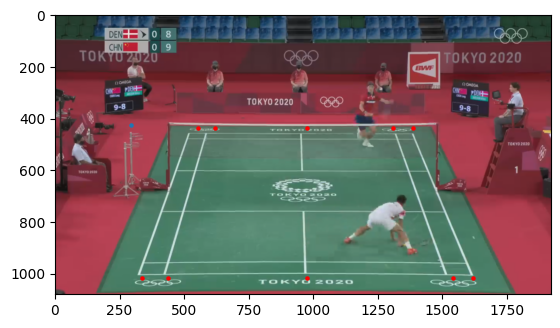

In [ ]:
plt.imshow(input_raw)
for point in keypoints_court:
  plt.scatter(point[0], point[1], c='red',s=5)
plt.scatter(results[0].boxes.xyxy.tolist()[0][0],  results[0].boxes.xyxy.tolist()[0][1], s=5)